In [ ]:
import pandas as pd
import numpy as np
import time
import random
from itertools import chain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
face_training_data = pd.read_csv("/content/drive/MyDrive/data/facedata/facedatatrain",skip_blank_lines=False, header=None,squeeze  = True)
face_training_labels  = pd.read_csv("/content/drive/MyDrive/data/facedata/facedatatrainlabels",skip_blank_lines=False, header=None)
face_test_images = pd.read_csv("/content/drive/MyDrive/data/facedata/facedatatest",skip_blank_lines=False, header=None,squeeze  = True)
face_test_labels = pd.read_csv("/content/drive/MyDrive/data/facedata/facedatatestlabels",skip_blank_lines=False, header=None)
face_validation_images = pd.read_csv("/content/drive/MyDrive/data/facedata/facedatavalidation",skip_blank_lines=False, header=None,squeeze  = True)
face_validation_labels = pd.read_csv("/content/drive/MyDrive/data/facedata/facedatavalidationlabels",skip_blank_lines=False, header=None)

In [ ]:
print(face_training_data.shape)
print(face_training_labels.shape)
print(face_test_images.shape)
print(face_test_labels.shape)

(31570,)
(451, 1)
(10500,)
(150, 1)


In [ ]:
def transform_data(data):
    data_temp = data.copy()
    for i in range(data_temp.shape[0]):
      data_temp[i] = data_temp[i].replace(' ', '0').replace('#', '1').replace('+', '1')
    data_temp = data_temp.apply(lambda x: pd.Series(list(x)))
    data_temp = data_temp.apply(pd.to_numeric)
    return data_temp

In [ ]:
train_face_data= transform_data(face_training_data)
test_face_data=transform_data(face_test_images)

In [ ]:
percent=1

In [ ]:
num_samples  =  face_training_labels.shape[0]
data_random_samples = random.sample(range(num_samples), int(percent * num_samples))
data_sample_range = [ range(i * 70, (i+1)*70)  for i in data_random_samples]
data_sample_range = list(chain(*data_sample_range))
                        
train_face_data = train_face_data.iloc[data_sample_range]
face_training_labels = (np.asarray(face_training_labels)[data_random_samples])

In [ ]:
def colorpixelcount3(df, image_height, feature_size):
    count_list=[]
   
    for i in range(int(image_height/feature_size)):
        for j in range(int(df.shape[1]/feature_size)):
            count=0
            for k in range((i*feature_size),(i*feature_size)+feature_size):
                for l in range((j*feature_size),(j*feature_size)+feature_size):
                    if df.iloc[k,l]==1:
                        count=count+1
            count_list.append(count)
    return count_list        

In [ ]:
ts=time.time()

labels=[0,1]
feat_list=[]
for label in labels:
  re=0
  feat_temp_list=[]
  while re<(int(451*percent)):
    if face_training_labels[re][0]==label:
      temp=colorpixelcount3(train_face_data.iloc[(70*re):(70*(re+1))].reset_index(drop=True).T.reset_index(drop=True).T,70,2)
      feat_temp_list.append(temp)
    re=re+1
  feat_list.append(feat_temp_list)

face_feat_array=np.array(feat_list)

feature_list=[]
for lab in range(2):
  featu_list=[]
  for k in range(1050):
    sum_list=[]
    for j in range(5):
      c=0
      for i in range(len(face_feat_array[lab])):
        if face_feat_array[lab][i][k]==j:
          c=c+1
      sum_list.append(c)
    featu_list.append(sum_list)
  feature_list.append(featu_list)

face_feature_array=np.array(feature_list)

prob_list=[]

for l in range(2):
  face_prob_array=face_feature_array[l]/len(face_feat_array[l])
  for i in range(len(face_prob_array)):
    for j in range(len(face_prob_array[i])):
      if face_prob_array[i][j]==0:
        face_prob_array[i][j]=0.001
  prob_list.append(face_prob_array)

train_face_prob_array=np.array(prob_list)  


y_face_list=[]
for l in range(2):
  y_face_list.append(len(face_feat_array[l]))
y_face_array=np.array(y_face_list)

prob_y_face_array=y_face_array/(451*percent)


te=time.time()
t=te-ts

print(t)

41.980905294418335


In [ ]:
def classify_nb3(df, o, y):
  test_list=colorpixelcount3(df, o, y)
  p_list=[]
  for j in range(len(prob_y_face_array)):
    prob=1
    for i in range(len(test_list)):
      prob=prob*train_face_prob_array[j][i][test_list[i]]
    p_list.append(prob_y_face_array[j]*prob)
  return p_list.index(max(p_list))

In [ ]:
test_results2=[]
for i in range(len(face_test_labels)):
  res=classify_nb3(test_face_data.iloc[(70*i):(70*(i+1))].reset_index(drop=True), 70, 2)
  test_results2.append(res)

In [ ]:
def accuracy3(result_list):
  s_count=0
  for i in range(len(result_list)):
    if result_list[i]==face_test_labels[0][i]:
      s_count=s_count+1
  acc=((s_count/len(result_list))*100)
  return acc, s_count

In [ ]:
accuracy3(test_results2)

(71.33333333333334, 107)

In [ ]:
stats= pd.read_excel("/content/drive/MyDrive/data/Naive_bayes_face_stats.xlsx")
stats=stats.drop([1, 2, 3], axis=1)

In [ ]:
stats

,Percentage,Mean,Stddev,tt
0,0.1,58.700000,2.151743,4.07
1,0.2,65.986667,1.750010,7.71
2,0.3,67.986667,1.163457,11.83
3,0.4,71.910000,2.536198,15.78
4,0.5,71.553333,1.385111,20.40
5,0.6,70.663333,0.665006,23.55
6,0.7,70.220000,1.017988,27.29
7,0.8,70.433333,0.750555,31.74
8,0.9,71.330000,0.670000,34.80
9,1.0,71.330000,0.000000,39.80


In [ ]:
import matplotlib.pyplot as plt

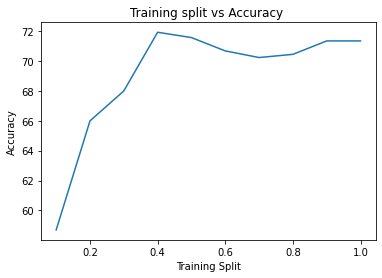

In [ ]:
plt.plot(stats.Percentage, stats.Mean )
plt.title("Training split vs Accuracy ")
plt.xlabel("Training Split")
plt.ylabel("Accuracy")
plt.show()

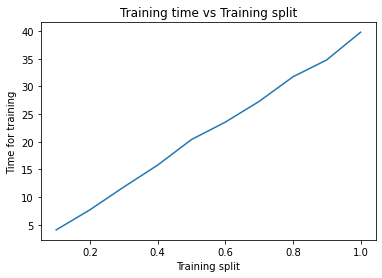

In [ ]:
plt.plot(stats.Percentage,stats.tt )
plt.title("Training time vs Training split")
plt.xlabel("Training split")
plt.ylabel("Time for training")
plt.show()